# RDKit Utility: Find and Highlight the Maximum Substructure Between a Set of Molecules 

When analyzing a set of molecules, you might want to find the maximum common substructure (MCS) match between them. This utility function `SmilesMCStoGridImage` does that, displays the SMARTS substructure as a molecule, and displays all the molecules in a grid with their substructure highlighted and that core aligned.

In [89]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem import rdFMCS

- Find an example (that aligns cores) of passing a keyword argument through to rdFMCS.FindMCS

In [90]:
def SmilesMCStoGridImage(molecules, align_core=True, verbose=False, **kwargs):
     """
     Convert a list (or dictionary) of SMILES strings to an RDKit grid image of the maximum common substructure (MCS) match between them

     :returns: RDKit grid image, and (if verbose=True) MCS SMARTS string and molecule, and list of molecules for input SMILES strings
     :rtype: RDKit grid image, and (if verbose=True) string, molecule, and list of molecules
     :param molecules: The SMARTS molecules to be compared and drawn
     :type molecules: List of (SMARTS) strings, or dictionary of (SMARTS) string: (legend) string pairs
     :param align_core: Whether to align the MCS cores when plotting the molecules; default is True
     :type align_core: boolean
     :param verbose: Whether to return verbose output (MCS SMARTS string and molecule, and list of molecules for input SMILES strings); default is False so calling this function will present a grid image automatically
     :type verbose: boolean
     """
     mols = [Chem.MolFromSmiles(smile) for smile in molecules]
     res = rdFMCS.FindMCS(mols, **kwargs)
     mcs = res.smartsString
     mcs_mol = Chem.MolFromSmarts(res.smartsString)
     smarts = res.smartsString
     smart_mol = Chem.MolFromSmarts(smarts)
     smarts_and_mols = [smart_mol] + mols

     smarts_legend = "Max substructure match"

     # If user supplies a dictionary, use the values as legend entries for molecules
     if isinstance(molecules, dict):
          mol_legends = [molecules[molecule] for molecule in molecules]
     else:
          mol_legends = ["" for mol in mols]

     legends =  [smarts_legend] + mol_legends
    
     matches = [""] + [mol.GetSubstructMatch(mcs_mol) for mol in mols]

     subms = [x for x in smarts_and_mols if x.HasSubstructMatch(mcs_mol)]

     Chem.Compute2DCoords(mcs_mol)

     if align_core:
          for m in subms:
               _ = Chem.GenerateDepictionMatching2DStructure(m, mcs_mol)

     drawing = Draw.MolsToGridImage(smarts_and_mols, highlightAtomLists=matches, legends=legends)

     if verbose:
          return drawing, mcs, mcs_mol, mols
     else:
          return drawing

## Examples

All you have to provide to `SmilesMCStoGridImage` is a lis of SMILES strings, and it will return a grid image:

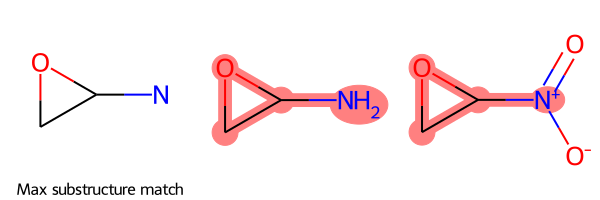

In [95]:
SmilesMCStoGridImage(["NC1OC1", "C1OC1[N+](=O)[O-]"])

If you want to label the molecules in the grid image, provide instead a *dictionary* of molecules where each
- key is the SMILES string
- value is the legend for that molecule, for example its name or a description

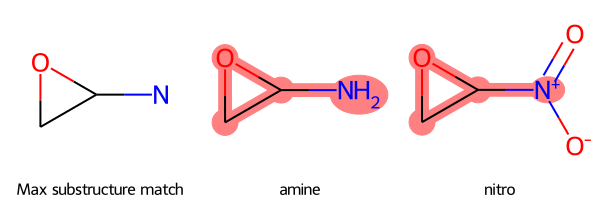

In [108]:
SmilesMCStoGridImage({"NC1OC1": "amine", "C1OC1[N+](=O)[O-]": "nitro"})

If you want not just the grid image, but also the substructure match and molecule, plus the molecules for the SMILES strings, set `verbose=True`. You do the have to explicitly call the image to draw it.

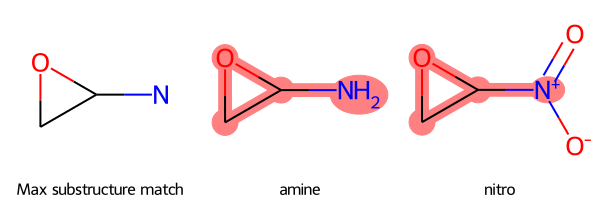

In [110]:
drawing, mcs, mcs_mol, mols = SmilesMCStoGridImage({"NC1OC1": "amine", "C1OC1[N+](=O)[O-]": "nitro"}, verbose=True)
drawing

`mcs` is the SMARTS string for the maximum common substructure (MCS):

In [99]:
mcs

'[#7]-[#6]1-[#8]-[#6]-1'

`mcs_mol` is the molecular representation of that MCS:

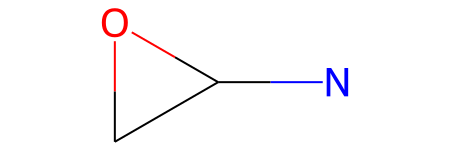

In [100]:
mcs_mol

`mols` is the list of RDKit molecules:

In [105]:
mols

You can plot each molecule, with the MCS highlighted, by indexing the molecule in `mols`:

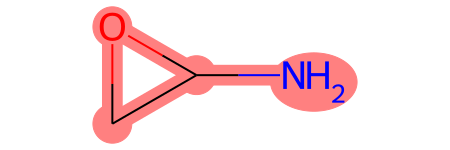

In [106]:
mols[0]

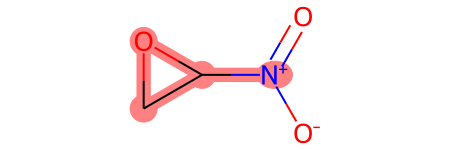

In [107]:
mols[1]

## Caveat About Aligning Core
The SMARTS substructure match may not match the form of the molecule. For example, if you input two six-membered carbon rings, the SMARTS substructure match is a linear chain of six carbons. So if you align the molecules to that core, you will get some odd-looking "rings":

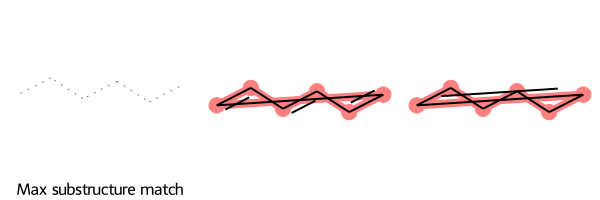

In [93]:
SmilesMCStoGridImage(["c1ccccc1", "C1CCCC=C1"])

To address this case, you can set `align_core=False` (its default value is `True`):

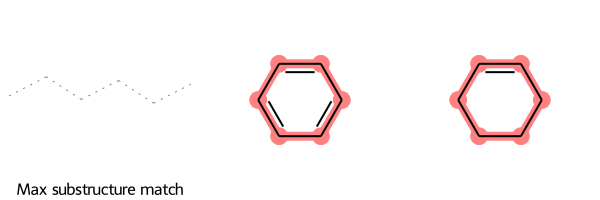

In [94]:
SmilesMCStoGridImage(["c1ccccc1", "C1CCCC=C1"], align_core=False)

## Example With Larger Molecules

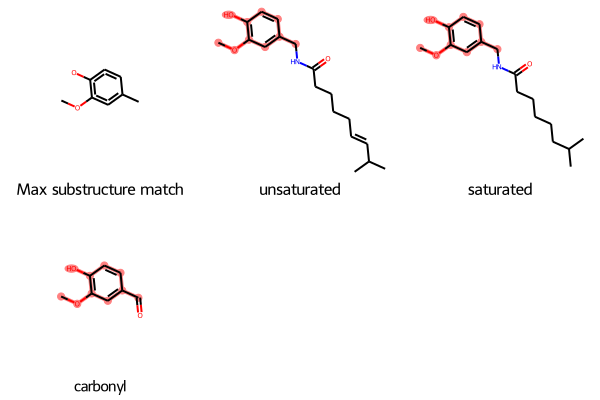

In [109]:
SmilesMCStoGridImage({"O=C(NCc1cc(OC)c(O)cc1)CCCC/C=C/C(C)C": "unsaturated", "CC(C)CCCCCC(=O)NCC1=CC(=C(C=C1)O)OC": "saturated", "c1(C=O)cc(OC)c(O)cc1": "carbonyl"})